In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import curve_fit #simpliest scipy fitting method
import scipy.special as sf

y = [0.25       0.25       0.24999998 ... 0.08841487 0.08840161 0.08838835] fmax = 0.25
Exact Solution 0.3535534 Ratio 0.7101 Area 0.5 Integral 0.35505


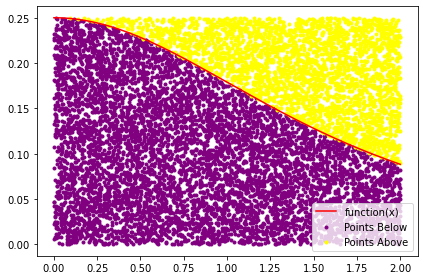

In [89]:
a = 0
b = 2
N = 10000
dx = (b-a)/N

def func(x):
    return 2/(4+x**2)**(3/2)

x=np.linspace(a,b,N)
y=func(x)


fmax = max(y)

print('y =',y,'fmax =',fmax)

xr = a + (b - a)*np.random.random(N) #between x0 and x1
yr = np.random.random(N)*fmax

ib = np.where(yr < func(xr))
ia = np.where(yr >= func(xr))

#area of the rectangel * the ratio of points below function to total points
r = float(len(ib[0])/N)
A = (b-a)*fmax
I = r*A


fig = plt.figure('Monte Carlo Integration')
plt.scatter(xr[ib], yr[ib], color = "purple", marker = '.',label='Points Below')
plt.scatter(xr[ia], yr[ia], color = "yellow", marker = '.', label = 'Points Above')
plt.plot(x, y, color = "red", label= 'function(x)')
plt.legend()
plt.tight_layout();

Exsol = 0.3535534
print('Exact Solution',Exsol,'Ratio',r,'Area',A,'Integral',I)

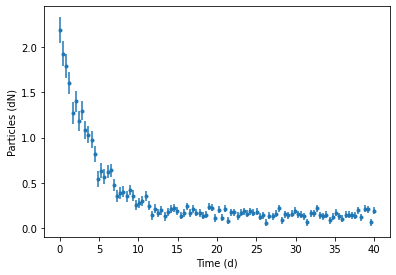

In [90]:
dt, dN, dN_unc = np.loadtxt('decay_data.txt', unpack=True)

d_fig = plt.figure()
d_ax = d_fig.add_axes([0.15,0.1,0.8,0.8])
d_ax.errorbar(dt, dN, yerr = dN_unc, fmt='.')
d_ax.set_xlabel('Time (d)')
d_ax.set_ylabel('Particles (dN)');



In [107]:
p0=p1=p2=1.0
def f_decay(t,p0,p1,p2):
    return p0*np.exp(-t/p1)+p2

def get_chi_sq(x,y,s,p):
    for i in range(0,len(x)):
        RR = 0.0
        RR += ((y[i] - f_decay(x[i],p[0],p[1],p[2]))/s[i])**2
    return RR

IP = np.array([1,1,1])
plist = [IP]
RRs = [get_chi_sq(dt,dN,dN_unc,IP)]

for i in range(N):
    tp = [np.random.normal(plist[-1][0],0.5),np.random.normal(plist[-1][1],0.5),np.random.normal(plist[-1][2],0.5)]
    tRR = get_chi_sq(dt,dN,dN_unc,tp)
    t = np.random.random() <= ((RRs[-1])/tRR)
    if t:
        plist.append(tp)
        RRs.append(tRR)
    else :
        plist.append(plist[-1])
        RRs.append(RRs[-1])
        
chisq = np.amin(RRs)
best_i = RRs.index(chisq)
best_p = plist[best_i]
print(best_p)
print('p0',best_p[0], 'p1',best_p[1], 'p2',best_p[2], 'chisquare', chisq,'loc',best_i)

[0.3681562821696092, 5.6088575716037194, 0.19146598934361708]
p0 0.3681562821696092 p1 5.6088575716037194 p2 0.19146598934361708 chisquare 2.3740128873613492e-06 loc 1529


In [99]:
dof = len(dN)-len(best_p)-1
rchisq = chisq/dof
p_value = sf.gammaincc(dof/2.0, chisq/2.0)

print('degrees of freedom=',dof,'reduce chi^2=',rchisq,'p value=',p_value)
#the p value is > 5% so this might not be a good fit

degrees of freedom= 96 reduce chi^2= 4.780754105375466e-09 p value= 1.0


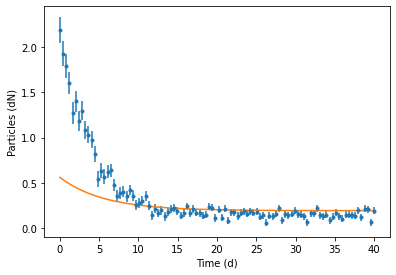

In [108]:
d_fig = plt.figure()
d_ax = d_fig.add_axes([0.15,0.1,0.8,0.8])
d_ax.errorbar(dt, dN, yerr = dN_unc, fmt='.')
d_ax.plot(dt,f_decay(dt,*best_p))
d_ax.set_xlabel('Time (d)')
d_ax.set_ylabel('Particles (dN)');


(array([5.000e+00, 4.000e+00, 0.000e+00, 9.988e+03, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00]),
 array([-0.29698342, -0.15707491, -0.01716639,  0.12274212,  0.26265063,
         0.40255914,  0.54246765,  0.68237616,  0.82228468,  0.96219319,
         1.1021017 ]),
 <BarContainer object of 10 artists>)

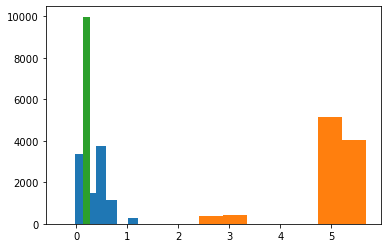

In [117]:
ps = np.array(plist)
fig = plt.figure()
plt.hist(ps[:,0], bins=10)
plt.hist(ps[:,1],bins=10)
plt.hist(ps[:,2],bins=10)
